In [2]:
import numpy
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook,
# not an external window
%matplotlib inline

from model import NeuralNetwork
from utils import load_csv, to_nn_input
from artist import draw_number, draw_dream, rotate_number

In [18]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
# learning rate is 0.3
learning_rate = 0.1
# #create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
train_data = load_csv("data/mnist_train.csv")
test_data = load_csv("data/mnist_test.csv")

In [19]:
# Training
epochs = 5
for e in range(epochs):
    print("Epoch: ", e)
    n.train_dataset(train_data)
    n.train_dataset([rotate_number(i, 5) for i in train_data])
    n.train_dataset([rotate_number(i, -5) for i in train_data])

Epoch:  0


7


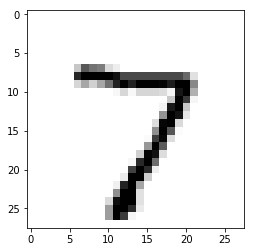

In [5]:
print(test_data[0][0])
draw_number(test_data[0])

In [31]:
input = to_nn_input(test_data[0])
n.query(input)

array([[ 0.03995076],
       [ 0.00210457],
       [ 0.00743725],
       [ 0.00753534],
       [ 0.00102642],
       [ 0.00139327],
       [ 0.00794972],
       [ 0.97266134],
       [ 0.00432417],
       [ 0.00929683]])

In [12]:
scorecard = []
# go through all the records in the test data set
for record in test_data:
    correct_label = int(record[0])
    inputs = to_nn_input(record)
    outputs = n.query(inputs)

    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

In [13]:
scorecard_array = numpy.asarray(scorecard)
print ("performance =", scorecard_array.sum()/ scorecard_array.size)

performance = 0.9244


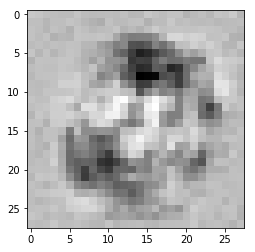

In [17]:
ny_number = 0
targets = numpy.zeros(output_nodes) + 0.01
targets[ny_number] = 0.99
img = n.back_query(targets)
draw_dream(img)

In [6]:
n.export_network("save")